# Title
# Team: Big 10
## Data
The data from the WPRDC we used in this project consists of:

Pittsburgh PLI Violations:
https://data.wprdc.org/dataset/pittsburgh-pli-violations-report/resource/4e5374be-1a88-47f7-afee-6a79317019b4

Allegheny County Obesity Rates:
https://data.wprdc.org/dataset/allegheny-county-obesity-rates/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa

Pittsburgh Arrests:
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

## Metric
Our metric equally weighs each aspect, so the ranking of a neighborhood in any aspect is at most one third of the best possible score of 3.0. To calculate this, a neighborhood's ranking is seen as a ratio, with 1.0 being the best and 0.0 being the worst, and that ratio is added to its total score. The neighborhood with the total score closest to 3.0 is deemed the best.
## Conclusion
We found that the best neighborhood is 
# Analyses

In [17]:
# total scores for each neighborhood
totals = dict()

## Building violation analysis by neighborhood

&lt;AxesSubplot:title={&#39;center&#39;:&#39;Building code violations by neighborhood in Pittsburgh&#39;}, xlabel=&#39;Number of building code violations&#39;, ylabel=&#39;NEIGHBORHOOD&#39;&gt;

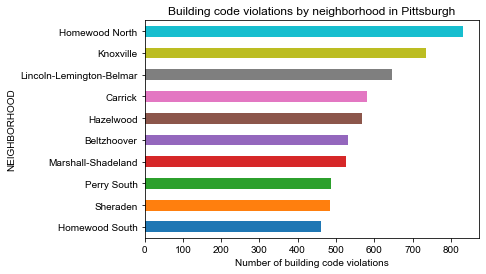

In [1]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# read in the violation data
violations = pd.read_csv("building-violations.csv")
# get only rows with violations found, then count how many rows of this kind are in each neighborhood and sort
violations = violations.loc[violations["INSPECTION_RESULT"]=="Violations Found"].groupby('NEIGHBORHOOD').size().sort_values()
# set up plot
plt.xlabel("Number of building code violations")
plt.ylabel("Neighborhood")
plt.style.use("seaborn-white")
# plot the neighborhoods with the most violations
violations.tail(10).plot(kind="barh",
title="Building code violations by neighborhood in Pittsburgh")


&lt;AxesSubplot:title={&#39;center&#39;:&#39;Building code violations by neighborhood in Pittsburgh&#39;}, ylabel=&#39;NEIGHBORHOOD&#39;&gt;

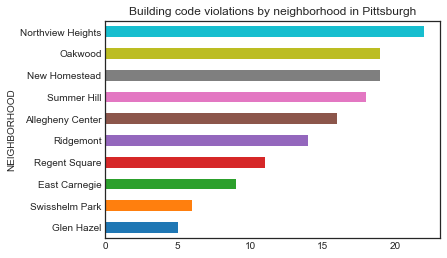

In [2]:
# plot the neighborhoods with the fewest violations
violations.head(10).plot(kind="barh",
title="Building code violations by neighborhood in Pittsburgh")

## Conclusion

Building code violations are a good indicator of the quality of housing in a neighborhood, which is an important factor in picking the best neighborhood.
The neighborhoods with the lowest building code violations, not accounting for the size of the neighborhood, are East Carnegie, Swisshelm Park, and Glen Hazel, while the worst are Homewood North, Knoxville, and Lincoln-Lemington-Belmar.

The strongest similarity between the neighborhoods with the fewest violations is their small size. This is not a strong correlation, though, because the neighborhoods with the most violations include (but are not exclusively made up of) small areas as well. For example, the top two neighborhoods in terms of violation count are under half a sq mile in size, but Lincoln–Lemington–Belmar, the third highest, is 1.812 sq miles.

In [19]:
# calculate scores and add to totals
vd = violations.to_dict()
for i,n in enumerate(vd):
    if n in totals:
        totals[n]+=1.0-i/len(vd)
    else:
        totals[n]=1.0-i/len(vd)